**活动类别平衡性分析**

In [9]:
import pandas as pd
import numpy as np

def class_distribution(data):
    """
    该函数实现各分类数据的数量和百分比统计
    """
    label = ['fall', 'run', 'walk', 'cycle', 'brushing_teeth', 'cut', 'eat', 'folding_clothes', 'use_computer',
             'wash_dish', 'wash_face', 'write', 'play_phone', 'sweep', 'mop', 'wc', 'wash_window', 'drink',
             'watch_tv', 'hang_out_clothes', 'ironing']
    df = pd.DataFrame(data) # 转化为DataFrame格式
    counts = df.groupby(0).size() # axis=0沿行分组;size()方法统计每个组的大小
    counts = counts.values

    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%s, total=%d, percentage=%.3f%%' % (label[i], counts[i], percent))


train_y = np.load('/home/intelligence/Robin/Dataset/save_raw_data/insole_train_win_y.npy', allow_pickle=True)
train_y = np.expand_dims(train_y, axis=1)
test_y = np.load('/home/intelligence/Robin/Dataset/save_raw_data/insole_test_win_y.npy', allow_pickle=True)
test_y = np.expand_dims(test_y, axis=1)
combined = np.vstack((train_y, test_y))
print('Total Class Distribution [sliding_window=300]')
class_distribution(combined)

Total Class Distribution [sliding_window=300]
Class=fall, total=1664, percentage=4.187%
Class=run, total=1873, percentage=4.713%
Class=walk, total=1906, percentage=4.796%
Class=cycle, total=1885, percentage=4.743%
Class=brushing_teeth, total=1934, percentage=4.866%
Class=cut, total=1895, percentage=4.768%
Class=eat, total=1899, percentage=4.778%
Class=folding_clothes, total=2066, percentage=5.199%
Class=use_computer, total=2025, percentage=5.095%
Class=wash_dish, total=1919, percentage=4.829%
Class=wash_face, total=1917, percentage=4.824%
Class=write, total=1894, percentage=4.766%
Class=play_phone, total=1915, percentage=4.819%
Class=sweep, total=1867, percentage=4.698%
Class=mop, total=1876, percentage=4.720%
Class=wc, total=1910, percentage=4.806%
Class=wash_window, total=1897, percentage=4.773%
Class=drink, total=1901, percentage=4.783%
Class=watch_tv, total=1945, percentage=4.894%
Class=hang_out_clothes, total=1760, percentage=4.429%
Class=ironing, total=1794, percentage=4.514%


**绘制不同志愿者的所有活动数据折线图**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualization_activities(labels_l, subject_id, x_step=500):
    data = np.load('/home/intelligence/Robin/Dataset/insole_dataset_new/insole_domain_'+ subject_id +'_wd.data', allow_pickle=True)
    value = data[0][0]
    label = data[0][1]
    act_id = 0
    fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(30,20))
    for r in range(6):
        for c in range(5):
            if act_id == 29:
                break
            start_index = np.where(label == act_id)[0][0]
            end_index = start_index + x_step
            ax[r,c].set_title(labels_l[act_id])
            ax[r,c].set_ylim((0, 2700))
            ax[r,c].plot(value[start_index:end_index,0], linewidth=1.0, linestyle='-', label='p1')
            ax[r,c].plot(value[start_index:end_index,1], linewidth=1.0, linestyle='-', label='p2')
            ax[r,c].plot(value[start_index:end_index,3], linewidth=1.0, linestyle='-', label='p4')
            ax[r,c].plot(value[start_index:end_index,4], linewidth=1.0, linestyle='-', label='p5')
            ax[r,c].plot(value[start_index:end_index,6], linewidth=1.0, linestyle='-', label='p7')
            ax[r,c].plot(value[start_index:end_index,7], linewidth=1.0, linestyle='-', label='p8')
            ax[r,c].legend()
            act_id += 1
            if r == 5:
                ax[r,c].set_xlabel("Time_steps", size=12)
            if c == 0:
                ax[r,c].set_ylabel("Pressure Value", size=12)
    plt.suptitle('subject_'+subject_id, fontsize=17)  # 为整个画图添加标题
    plt.tight_layout(pad=1.5)  # 设置子图之间的间距，默认值为1.08
    plt.savefig('/home/intelligence/Robin/Multimode_HAR/plot/subject_'+ subject_id +'.svg', format='svg')


label_list = ['fall', 'run', 'walk', 'cycle', 'lay', 'squat', 'mop', 'drink', 'sweep',
                  'brushing_teeth', 'cut', 'eat', 'folding_clothes', 'hang_out_clothes', 'ironing',
                  'open_door', 'open_fridge',  'sit',  'stand', 'use_computer', 'wash_dish',
                  'wash_face', 'wash_window', 'watch_tv', 'watering_flowers', 'write', 'wc', 'play_phone', 'switch']
visualization_activities(label_list, '16', x_step=1000)

**绘制不同志愿者同一活动的数据折线图**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visual_same_activitie(act_1, act_2=2, x_step=500):
    """
    :param act_1: 第一个显示的活动
    :param act_2: 第二个显示的活动
    :param x_step: 显示的X轴的时间步长
    :return:
    """
    label_list = ['fall', 'run', 'walk', 'cycle', 'brushing_teeth', 'cut', 'eat', 'folding_clothes', 'use_computer',
                  'wash_dish', 'wash_face', 'write', 'play_phone', 'sweep', 'mop', 'wc', 'wash_window', 'drink',
                  'watch_tv', 'hang_out_clothes', 'ironing']
    subject_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
    fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(30,20))
    act_id = act_1
    sub_id = 0
    for r in range(6):
        if r==3:
            act_id =act_2
        for c in range(5):
            data = np.load('/home/intelligence/Robin/Dataset/insole_new_label/insole_domain_'+ subject_list[sub_id]
                           + '_wd.data', allow_pickle=True)
            value = data[0][0]
            label = data[0][1]
            start_index = np.where(label == act_id)[0][0]
            end_index = start_index + x_step

            ax[r, c].set_title('subject_'+ subject_list[sub_id] + '_' + label_list[act_id])
            ax[r, c].set_ylim((0, 2700))
            ax[r, c].plot(value[start_index:end_index,0], linewidth=1.0, linestyle='-', label='p1')
            # ax[r, c].plot(value[start_index:end_index,1], linewidth=1.0, linestyle='-', label='p2')
            ax[r, c].plot(value[start_index:end_index,3], linewidth=1.0, linestyle='-', label='p4')
            ax[r, c].plot(value[start_index:end_index,4], linewidth=1.0, linestyle='-', label='p5')
            ax[r, c].plot(value[start_index:end_index,6], linewidth=1.0, linestyle='-', label='p7')
            ax[r, c].plot(value[start_index:end_index,7], linewidth=1.0, linestyle='-', label='p8')
            ax[r,c].legend()
            if r == 5:
                ax[r,c].set_xlabel("Time steps", size=12)
            if c == 0:
                ax[r,c].set_ylabel("Pressure Value", size=12)
            sub_id += 1
            if sub_id == 15:
                sub_id = 0

    plt.tight_layout(pad=1.5)  # 设置子图之间的间距，默认值为1.08
    plt.savefig('/home/intelligence/Robin/' + label_list[act_1] + ' | ' + label_list[act_2] + '.svg', format='svg')

visual_same_activitie(1, 2, x_step=2000)

*单张图片格式*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
act_id = 0
subject_id = '1'
data = np.load('/home/intelligence/Robin/Dataset/insole_dataset_new/insole_domain_'+ subject_id +'_wd.data', allow_pickle=True)
value = data[0][0]
label = data[0][1]
label_list = ['fall', 'run', 'walk', 'cycle', 'lay', 'squat', 'mop', 'drink', 'sweep',
                  'brushing_teeth', 'cut', 'eat', 'folding_clothes', 'hang_out_clothes', 'ironing',
                  'open_door', 'open_fridge',  'sit',  'stand', 'use_computer', 'wash_dish',
                  'wash_face', 'wash_window', 'watch_tv', 'watering_flowers', 'write', 'wc', 'play_phone', 'switch']
start_index = np.where(label == act_id)[0][0]
end_index = start_index + 500

plt.figure(figsize=(10, 10))
plt.title(label_list[act_id], fontsize=20)
plt.xlabel('time_steps-10s', fontsize=20)
plt.ylabel("pressure_value",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(value[start_index:end_index,1], linewidth=2.0, linestyle='-', label='p2')
plt.plot(value[start_index:end_index,4], linewidth=2.0, linestyle='-', label='p5')
plt.plot(value[start_index:end_index,7], linewidth=2.0, linestyle='-', label='p8')
plt.ylim((0, 3000))
plt.legend(loc="upper right",fontsize=20)  # 设置折线名称
# plt.savefig('plot.svg', format='svg')
plt.show()

**绘制压力传感器特征重要性排序图**

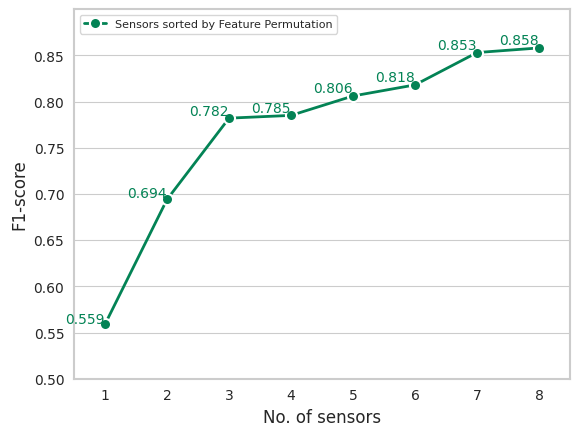

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#输入数据
x = [1, 2, 3, 4, 5, 6, 7, 8]
y1 = [0.559, 0.694, 0.782, 0.785, 0.806, 0.818, 0.853, 0.858]

# 设置颜色代码
color1 = "#038355" # 孔雀绿
# color2 = "#ffc34e" # 向日黄
# 设置字体
font = {'family' : 'Times New Roman',
        'size'   : 12}
plt.rc('font', **font)

# 绘图
sns.set_style("whitegrid") # 设置背景样式
sns.lineplot(x=x, y=y1, color=color1, linewidth=2.0, marker="o", markersize=8, markeredgecolor="white", markeredgewidth=1.5, label='Sensors sorted by Feature Permutation')
# sns.lineplot(x=x, y=y2, color=color2, linewidth=2.0, marker="s", markersize=8, markeredgecolor="white", markeredgewidth=1.5, label='Line 2')

# 添加标题和标签
# plt.title("Title", fontweight='bold', fontsize=14)
plt.xlabel("No. of sensors", fontsize=12)
plt.ylabel("F1-score", fontsize=12)

# 添加图例
plt.legend(loc='upper left', frameon=True, fontsize=8)

# 设置刻度字体和范围
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0.5, 8.5)

plt.ylim(0.5, 0.9)
my_y_ticks = np.arange(0.5, 0.9, 0.05)
plt.yticks(my_y_ticks)
# 设置坐标轴样式
for spine in plt.gca().spines.values():
    spine.set_edgecolor("#CCCCCC")
    spine.set_linewidth(1.5)

# 显示图像
for i in range(len(y1)):
    plt.text(x[i], y1[i]*1.01, y1[i], fontsize=10, color=color1, verticalalignment='center', horizontalalignment='right')

plt.grid(axis="x")
plt.savefig('./Robin/sort.svg', format='svg')
plt.show()

**绘制多模态融合结果**

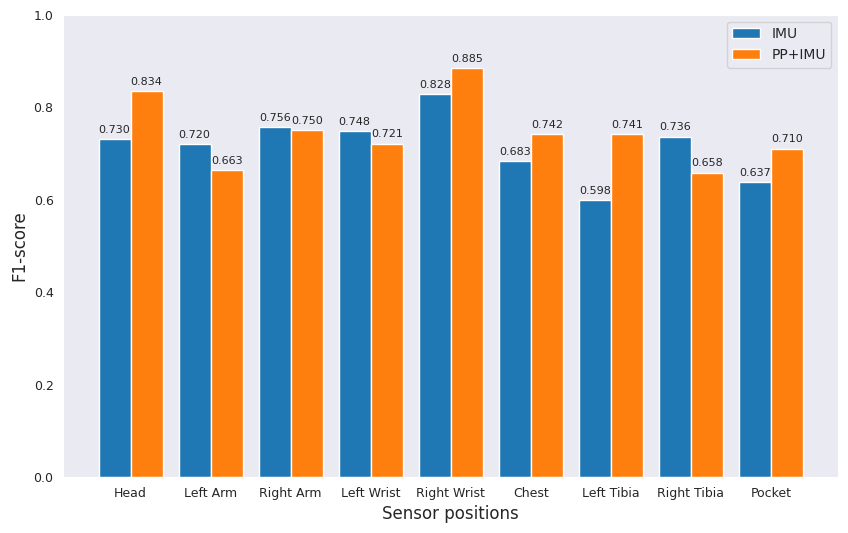

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x_labels = ['Head', 'Left Arm', 'Right Arm', 'Left Wrist', 'Right Wrist', 'Chest', 'Left Tibia', 'Right Tibia', 'Pocket']

#DeepConvLSTM
IMU = [0.730, 0.720, 0.756, 0.748, 0.828, 0.683, 0.598, 0.736, 0.637]
PP_IMU = [0.834, 0.663, 0.750, 0.721, 0.885, 0.742, 0.741, 0.658, 0.710]

# #FCN
# IMU = [0.945, 0.963, 0.964, 0.944, 0.981, 0.928, 0.923, 0.929, 0.933]
# PP_IMU = [0.970, 0.977, 0.980, 0.971, 0.986, 0.967, 0.968, 0.968, 0.964]
#
# #DCNN
# IMU = [0.912, 0.940, 0.949, 0.935, 0.966, 0.919, 0.906, 0.879, 0.917]
# PP_IMU = [0.938, 0.952, 0.961, 0.952, 0.972, 0.939, 0.913, 0.909, 0.930]


total_width, n = 0.8, 2
width = total_width / n
x = np.arange(len(x_labels))

plt.figure(figsize=(10, 6))
plt.bar(x-width/2 , IMU, width=width, label='IMU')
plt.bar(x+width/2, PP_IMU, width=width, label='PP+IMU')
plt.xticks(x, x_labels, fontproperties='Times New Roman', size=9)
plt.yticks(fontsize=9)
plt.ylim(0, 1)
plt.xlabel('Sensor positions', fontproperties='Times New Roman', size=12)
plt.ylabel('F1-score', fontproperties='Times New Roman', size=12)
fontsize = 8
for a, b in zip(x-width/2, IMU):
    plt.text(a, b+0.01, '%.3f' % b, ha='center', va='bottom', fontsize=fontsize)
for a, b in zip(x+width/2, PP_IMU):
    plt.text(a, b+0.01, '%.3f' % b, ha='center', va='bottom', fontsize=fontsize)

plt.legend(loc="upper right",fontsize=10)
plt.grid(False)
# plt.savefig('./Robin/DeepClstm.svg', format='svg')
plt.show()